In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from PIL import Image
import random

def load_data(data_dir):
    data = []
    for file in os.listdir(data_dir):
        if file.endswith('.csv'):
            file_path = os.path.join(data_dir, file)
            df = pd.read_csv(file_path, header=None, names=['attribute', 'variant_index', 'num_variants'])
            df['image'] = file.replace('.csv', '.png')
            data.append(df)
    return pd.concat(data, ignore_index=True)


data_dir = 'C:/Users/Asia/Desktop/gan/cartoonset10k/cartoonset10k'
data = load_data(data_dir)


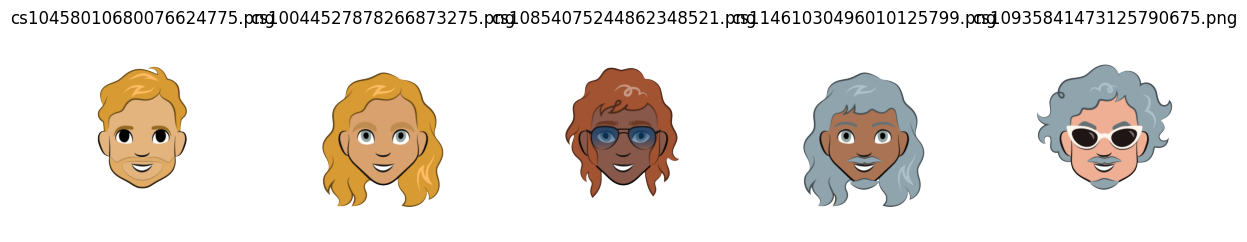

In [7]:
# wyswietlenie obrazow
num_images=5
images = [img for img in os.listdir(data_dir) if img.endswith('.png')]
selected_images = random.sample(images, num_images)

plt.figure(figsize=(15, 5))
for i, img_name in enumerate(selected_images):
    img_path = os.path.join(data_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
plt.show()

In [3]:
# Analiza podstawowa
print(data.head())
unique_attributes = data['attribute'].unique()
print(f"Liczba unikalnych atrybutów: {len(unique_attributes)}")
print("Atrybuty i liczba ich wariantów:")
print(data.groupby('attribute')['num_variants'].max())

        attribute  variant_index  num_variants                       image
0       eye_angle              2             3  cs10000053986926948907.png
1      eye_lashes              1             2  cs10000053986926948907.png
2         eye_lid              0             2  cs10000053986926948907.png
3     chin_length              2             3  cs10000053986926948907.png
4  eyebrow_weight              1             2  cs10000053986926948907.png
Liczba unikalnych atrybutów: 18
Atrybuty i liczba ich wariantów:
attribute
chin_length               3
eye_angle                 3
eye_color                 5
eye_eyebrow_distance      3
eye_lashes                2
eye_lid                   2
eye_slant                 3
eyebrow_shape            14
eyebrow_thickness         4
eyebrow_weight            2
eyebrow_width             3
face_color               11
face_shape                7
facial_hair              15
glasses                  12
glasses_color             7
hair                    111

In [4]:
# Podsumowanie danych statystycznych
summary = data.groupby('attribute')['variant_index'].describe()
print(summary)

                        count     mean        std  min   25%   50%   75%  \
attribute                                                                  
chin_length           10000.0   1.0075   0.817136  0.0   0.0   1.0   2.0   
eye_angle             10000.0   1.0059   0.813592  0.0   0.0   1.0   2.0   
eye_color             10000.0   1.9940   1.415403  0.0   1.0   2.0   3.0   
eye_eyebrow_distance  10000.0   0.9965   0.815325  0.0   0.0   1.0   2.0   
eye_lashes            10000.0   0.4987   0.500023  0.0   0.0   0.0   1.0   
eye_lid               10000.0   0.4988   0.500024  0.0   0.0   0.0   1.0   
eye_slant             10000.0   0.9991   0.814104  0.0   0.0   1.0   2.0   
eyebrow_shape         10000.0   6.5119   4.026969  0.0   3.0   7.0  10.0   
eyebrow_thickness     10000.0   1.4924   1.114750  0.0   1.0   1.0   2.0   
eyebrow_weight        10000.0   0.4995   0.500025  0.0   0.0   0.0   1.0   
eyebrow_width         10000.0   0.9857   0.820952  0.0   0.0   1.0   2.0   
face_color  

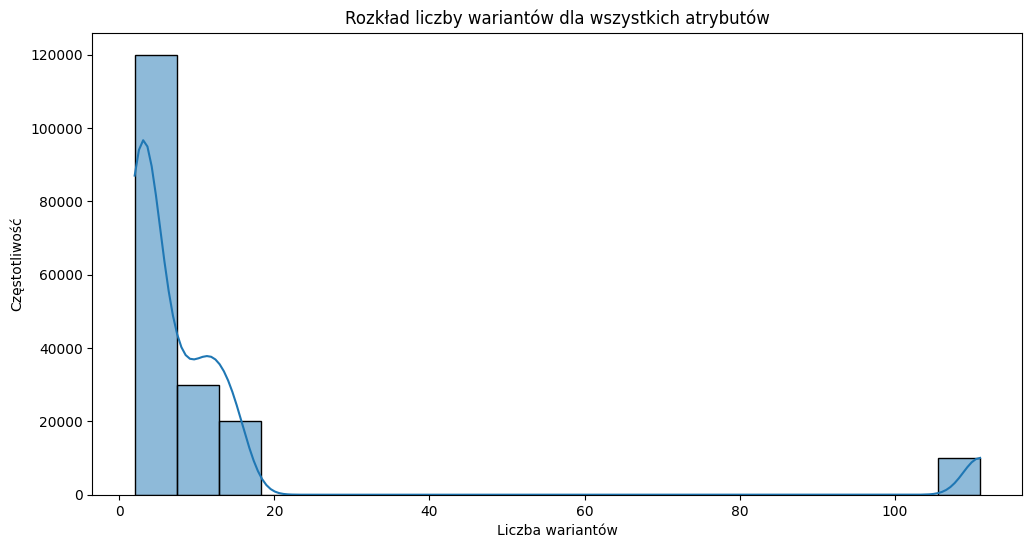

In [5]:
# Histogram ogólny rozkładu liczby wariantów dla wszystkich atrybutów
plt.figure(figsize=(12, 6))
sns.histplot(data['num_variants'], kde=True, bins=20)
plt.title("Rozkład liczby wariantów dla wszystkich atrybutów")
plt.xlabel("Liczba wariantów")
plt.ylabel("Częstotliwość")
plt.show()

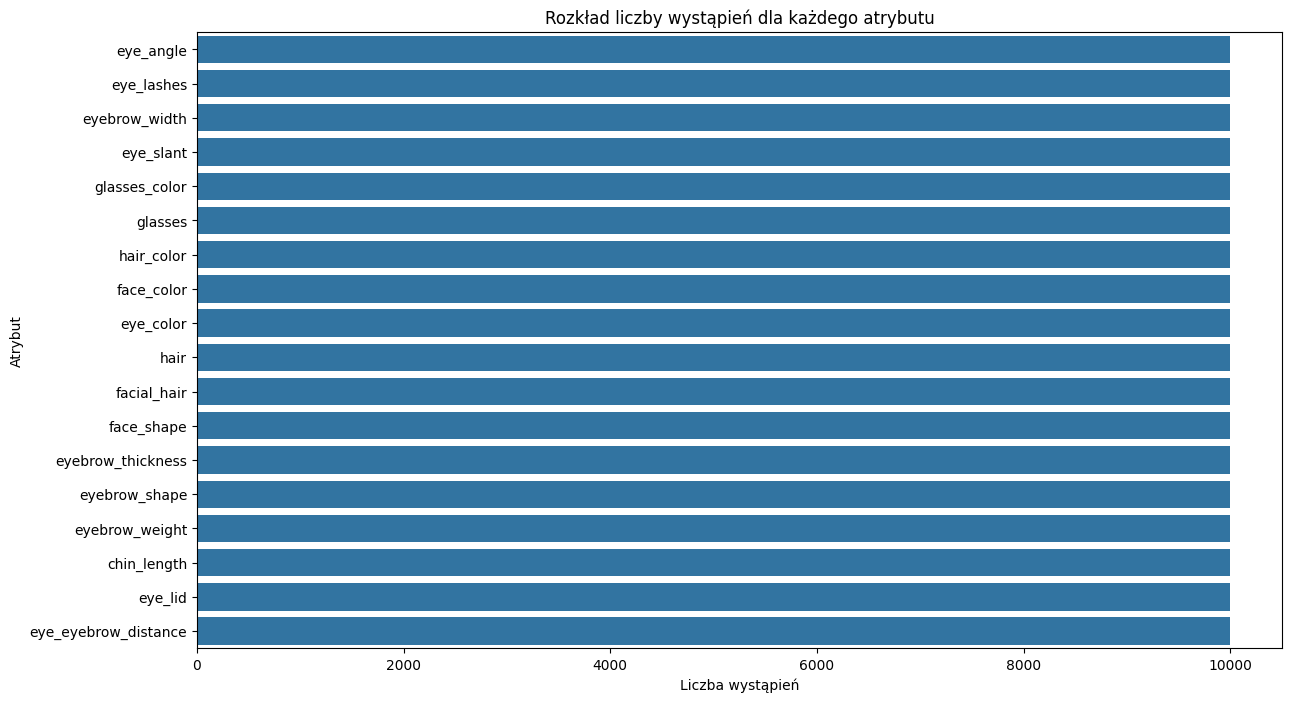

In [6]:
# Wykres rozkładu liczby wystąpień dla każdego atrybutu
plt.figure(figsize=(14, 8))
sns.countplot(y='attribute', data=data, order=data['attribute'].value_counts().index)
plt.title("Rozkład liczby wystąpień dla każdego atrybutu")
plt.xlabel("Liczba wystąpień")
plt.ylabel("Atrybut")
plt.show()

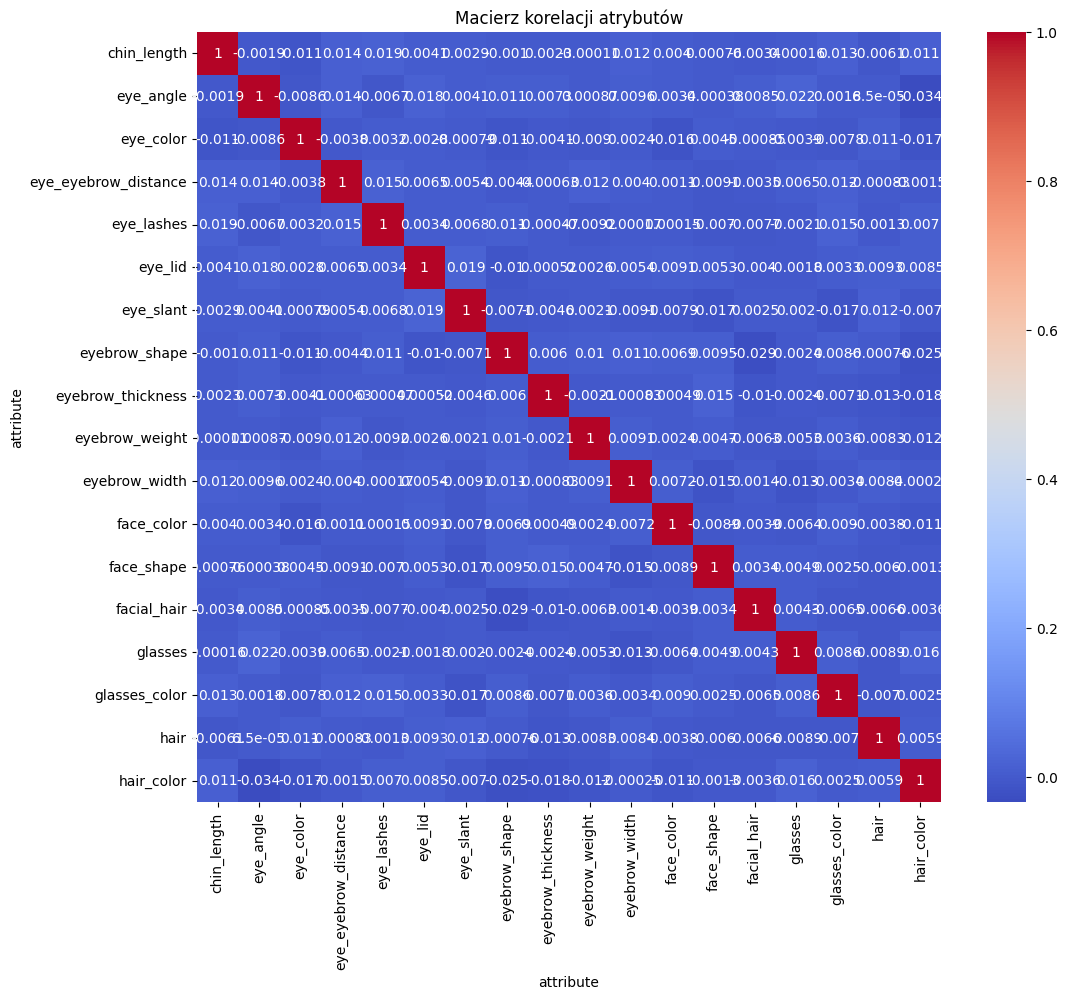

In [8]:
# Analiza współwystępowania wariantów atrybutów
attribute_pivot = data.pivot_table(index='image', columns='attribute', values='variant_index')
correlation_matrix = attribute_pivot.corr()

# Wykres korelacji między atrybutami
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji atrybutów")
plt.show()

In [ ]:
# Analiza statystyczna dla każdego atrybutu
for attribute in unique_attributes:
    attribute_data = data[data['attribute'] == attribute]
    print(f"Analiza dla atrybutu: {attribute}")
    print(attribute_data['variant_index'].describe())
    
    # Test normalności Shapiro-Wilka
    stat, p_value = stats.shapiro(attribute_data['variant_index'])
    print(f"Test Shapiro-Wilka dla normalności: stat={stat:.4f}, p-value={p_value:.4f}")
    
    # Histogram z rozkładem
    plt.figure(figsize=(10, 5))
    sns.histplot(attribute_data['variant_index'], kde=True, bins=20)
    plt.title(f"Rozkład wariantów dla {attribute}")
    plt.xlabel("Indeks wariantu")
    plt.ylabel("Liczba wystąpień")
    
    min_val = attribute_data['variant_index'].min()
    max_val = attribute_data['variant_index'].max()
    if all(attribute_data['variant_index'] % 1 == 0):
        plt.xticks(range(int(min_val), int(max_val) + 1))
    plt.show()

    # Test ANOVA dla wariancji (dla atrybutów z >1 wariantem)
    if attribute_data['num_variants'].max() > 1:
        groups = [attribute_data[attribute_data['variant_index'] == v]['variant_index'] for v in attribute_data['variant_index'].unique()]
        f_stat, anova_p = stats.f_oneway(*groups)
        print(f"ANOVA - statystyka F: {f_stat:.4f}, p-value={anova_p:.4f}\n")

# Wybór i wizualizacja atrybutów najbardziej skorelowanych
top_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_correlated = top_correlated[(top_correlated < 1) & (top_correlated > 0.5)]  # wybierz korelacje powyżej 0.5

# Sprawdzenie, czy znaleziono jakiekolwiek korelacje powyżej 0.5
if top_correlated.empty:
    print("Nie znaleziono korelacji między atrybutami powyżej wartości 0.5.")
else:
    print("Najwyższe korelacje między atrybutami:")
    print(top_correlated)

    # Wizualizacja atrybutów o najwyższej korelacji
    for (attr1, attr2), corr_value in top_correlated.items():
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=attribute_pivot, x=attr1, y=attr2)
        plt.title(f"Korelacja między {attr1} a {attr2} (r={corr_value:.2f})")
        plt.xlabel(attr1)
        plt.ylabel(attr2)
        plt.show()
